In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('house_price4.csv')

In [262]:
data.head()

,Địa chỉ,Diện tích,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số toilet,Pháp lý,Nội thất,Số phòng ngủ
0,"Nhà A18 ngõ 109 Đường Trường Chinh, Phường Phư...",39 m²,8.9 tỷ,3.2 m,8 m,Đông - Nam,Đông - Nam,7 tầng,7 phòng,Sổ đỏ/ Sổ hồng,Đầy đủ nội thất.,NaN
1,"Ngõ 1, Đường Bùi Xương Trạch, Phường Khương Đì...",56.6 m²,4.8 tỷ,3 m,3 m,Bắc,Bắc,4 tầng,3 phòng,Sổ đỏ/ Sổ hồng,NaN,4 phòng
2,"Ngõ 169, đường Trung Văn, Phường Trung Văn, Na...",33 m²,3.3 tỷ,5 m,NaN,NaN,NaN,2 tầng,2 phòng,Sổ đỏ/ Sổ hồng.,Nội thất cơ bản,2 phòng
3,"Ngõ 200, Đường Vĩnh Hưng, Phường Vĩnh Hưng, Ho...",32 m²,3.85 tỷ,NaN,NaN,Tây - Bắc,NaN,5 tầng,NaN,SĐCC.,NaN,NaN
4,"Ngõ 454, Đường Minh Khai, Phường Vĩnh Tuy, Ha...",34 m²,5.4 tỷ,3.4 m,NaN,NaN,NaN,5 tầng,4 phòng,NaN,"Để lại toàn bộ nội thất gồm: Sofa, bàn trà, bà...",3 phòng


# Format Data

In [263]:
districs = ['hoàng mai', 'long biên', 'thanh xuân', 'bắc từ liêm', 'ba đình', 'cầu giấy', 'đống đa', 'hai bà trưng', 'hoàn kiếm',
        'hà đông', 'tây hồ', 'nam từ liêm', 'đan phượng', 'gia lâm', 'đông anh', 'chương mỹ', 'hoài đức', 'ba vì', 'mỹ đức',
        'phúc thọ', 'thạch thất', 'quốc oai', 'thanh trì', 'thường tín', 'thanh oai', 'phú xuyên', 'mê linh', 'sóc sơn', 'ứng hòa', 'sơn tây']
def format_address(df):
    def handle_address(address):

        address = address.lower().split(',')
        if (len(address) > 2):
            dis = str(address[-2]).strip()
            if 'quận' in dis:
                dis = dis.replace('quận', '').strip()
            if 'huyện' in dis:
                dis = dis.replace('huyện', '').strip()
            if dis not in districs:
                dis = np.nan
        else:
            dis = np.nan
        return dis
    
    X = df.copy()
    X['Địa chỉ'] = X['Địa chỉ'].map(handle_address)
    return X


In [264]:
def format_price(df):
    def handle_price(row):
        price, unit = row['Mức giá'].split()
        if (unit != 'tỷ'):
            if (unit == 'triệu/m²'):
                price = float(price) * float(row['Diện tích']) / 1000
            else:
                price = np.nan
        else:
            price = float(price)
        return price
    
    X = df.copy()
    X['Mức giá'] = X.apply(handle_price, axis=1)
    return X


In [265]:
def format_furniture(df):
    def handle_furniture(furniture):
        luxurious = ['cao cấp', 'sang trọng', 'ngoại', 'châu âu']
        status = 1
        if pd.isna(furniture):
            status = 1
        elif any(substring in str(furniture).lower() for substring in luxurious):
            status = 2
        else:
            status = 1
        return status
    
    X = df.copy()
    X['Nội thất'] = X['Nội thất'].map(handle_furniture)
    return X


In [266]:
def format_data(df):
    X = df.copy()
    cols = ['Diện tích', 'Mặt tiền', 'Đường vào',
            'Số tầng', 'Số phòng ngủ', 'Số toilet']
    for col in cols:
        X[col] = X[col].str.split(expand=True)[0].astype('float')
        
    X = format_address(X)
    if 'Mức giá' in X.columns:
        X = format_price(X)
    X = format_furniture(X)
    X.drop(['Pháp lý'], axis=1, inplace=True)
    return X

In [267]:
data = format_data(data)
data

,Địa chỉ,Diện tích,Mức giá,Mặt tiền,Đường vào,Hướng nhà,Hướng ban công,Số tầng,Số toilet,Nội thất,Số phòng ngủ
0,thanh xuân,39.0,8.90,3.2,8.0,Đông - Nam,Đông - Nam,7.0,7.0,1,NaN
1,thanh xuân,56.6,4.80,3.0,3.0,Bắc,Bắc,4.0,3.0,1,4.0
2,nam từ liêm,33.0,3.30,5.0,NaN,NaN,NaN,2.0,2.0,1,2.0
3,hoàng mai,32.0,3.85,NaN,NaN,Tây - Bắc,NaN,5.0,NaN,1,NaN
4,hai bà trưng,34.0,5.40,3.4,NaN,NaN,NaN,5.0,4.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4993,hà đông,30.0,2.80,5.0,2.5,NaN,NaN,2.0,2.0,1,2.0
4994,hà đông,65.0,6.85,4.0,NaN,NaN,NaN,3.0,NaN,1,4.0
4995,hà đông,48.0,6.30,4.0,8.0,NaN,NaN,4.0,4.0,1,4.0
4996,hà đông,36.0,2.30,NaN,NaN,Đông - Nam,NaN,4.0,NaN,1,5.0


# Handle Missing Data

In [268]:
import seaborn as sns
def plot_missing_data(df):
    sns.set(rc={'figure.figsize': (12, 6)})

    nan_data = pd.Series(df.isnull().sum() / df.isnull().count()) * 100
    ax = sns.barplot(nan_data, nan_data.index, )
    ax.bar_label(ax.containers[0])

c:\Users\pqhuy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


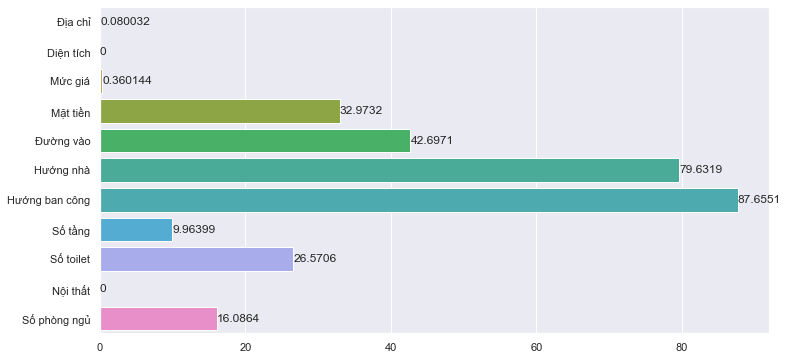

In [269]:
plot_missing_data(data)

In [270]:
def fillna_room(df):

    def fillna(row):
        if (pd.isna(row['Số phòng ngủ'])):
            row['Số phòng ngủ'] = int(row['Diện tích'] * row['Số tầng']/ area_bedrooom)
        if (pd.isna(row['Số toilet'])):
            row['Số toilet'] = int(row['Diện tích']  * row['Số tầng'] / area_toilet)
        return row

    X = df.copy()
    area_bedrooom = (X['Diện tích'] * X['Số tầng'] / X['Số phòng ngủ']).mean()
    area_toilet = (X['Diện tích'] * X['Số tầng'] / X['Số toilet']).mean()
    X = X.apply(fillna, axis=1)
    return X

In [271]:
def handle_missing_data(df):
    X = df.copy()

    X.drop(['Hướng nhà', 'Hướng ban công'], axis=1, inplace=True)

    X.dropna(subset=['Địa chỉ', 'Mức giá', 'Số tầng'], inplace=True, axis=0)

    X['Mặt tiền'].fillna(X['Mặt tiền'].mean(), inplace=True)

    X['Đường vào'].fillna(X['Đường vào'].mean(), inplace=True)
    
    X = fillna_room(X)
    return X

In [272]:
data = handle_missing_data(data)

c:\Users\pqhuy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


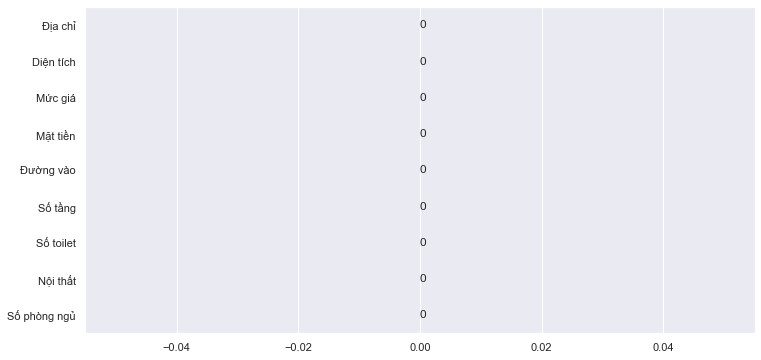

In [273]:
plot_missing_data(data)

# Handle Outliers

In [274]:
import matplotlib.pyplot as plt
def plot_boxplot(df):
    col = ['Số tầng', 'Đường vào', 'Mặt tiền', 'Số toilet',
        'Số phòng ngủ', 'Diện tích', 'Mức giá']
    fig = plt.figure(figsize=(15, 15), constrained_layout=True)

    subfigs = fig.subfigures(nrows=7, ncols=1)

    for row, subfig in enumerate(subfigs):
        subfig.suptitle(col[row])

        axes1, axes2 = subfig.subplots(nrows=1, ncols=2)
        axes1.hist(df[col[row]])
        axes2.boxplot(df[col[row]], vert=False)   


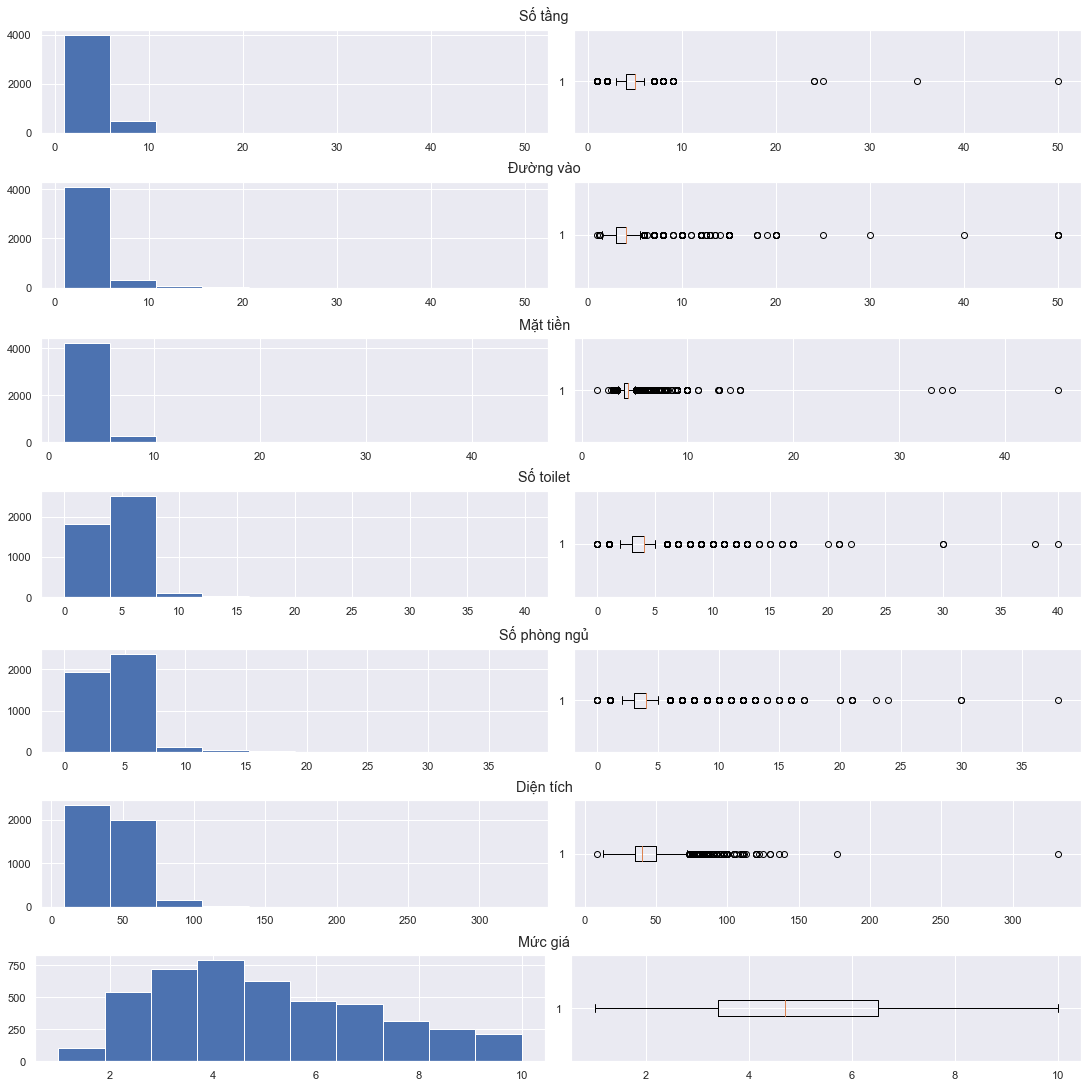

In [275]:
plot_boxplot(data)

In [276]:

def drop_outliers(df):
    cols = ['Số tầng','Mặt tiền', 'Đường vào', 'Số toilet', 'Số phòng ngủ', 'Diện tích']
    X = df.copy()
    for field_name in cols:
        Q1 = X[field_name].quantile(0.25)
        Q3 = X[field_name].quantile(0.75)
        iqr = Q3 - Q1
        upper_iqr = Q3 + 1.5 * iqr
        lower_iqr = Q1 - 1.5 * iqr
        
        df_outlier_upper = X[X[field_name] > upper_iqr]
        df_outlier_lower = X[X[field_name] < lower_iqr]
        df_outlier = pd.concat([df_outlier_lower, df_outlier_upper])
        X.drop(df_outlier.index, inplace=True)
        
    return X


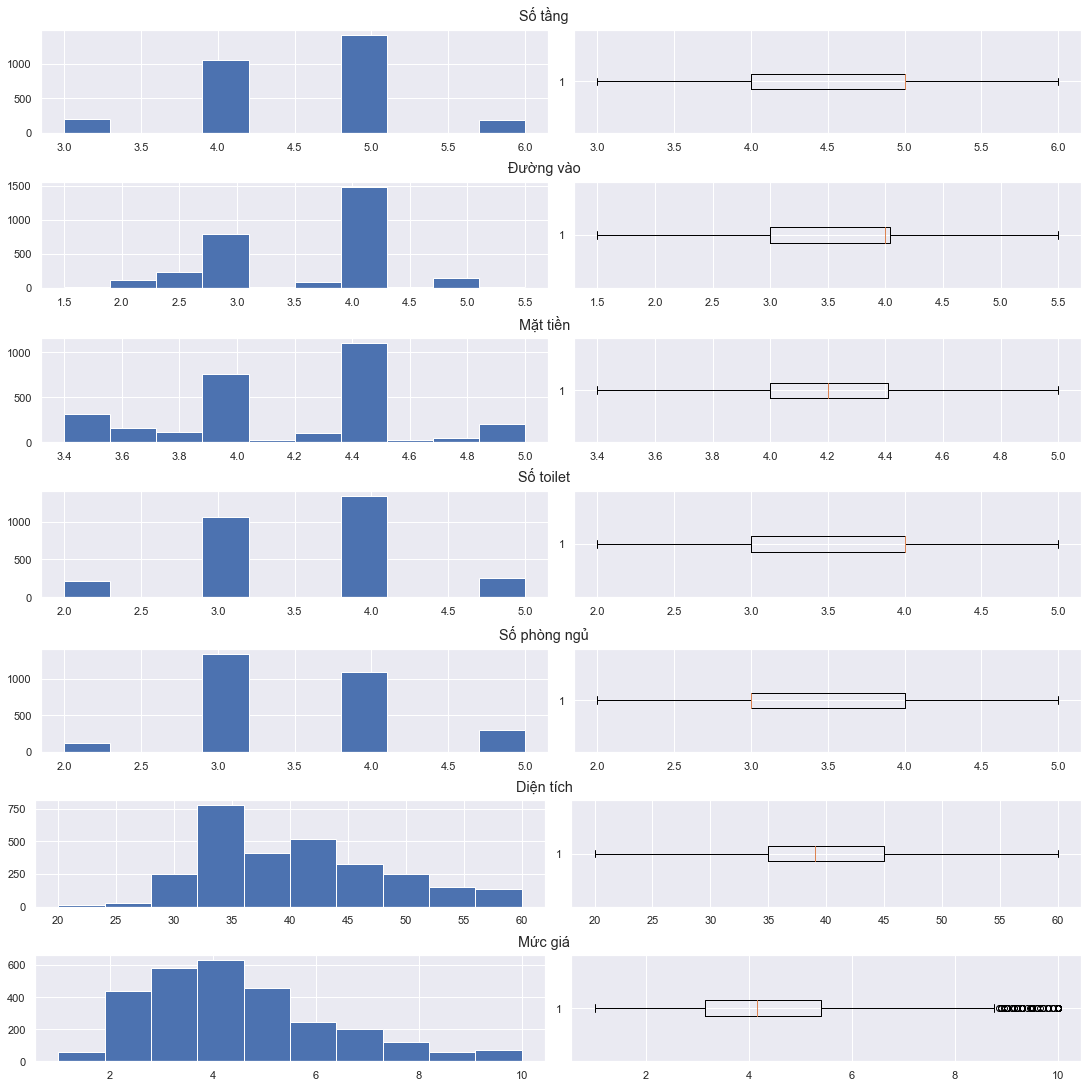

In [277]:
data = drop_outliers(data)
plot_boxplot(data)

<AxesSubplot:xlabel='count', ylabel='Địa chỉ'>

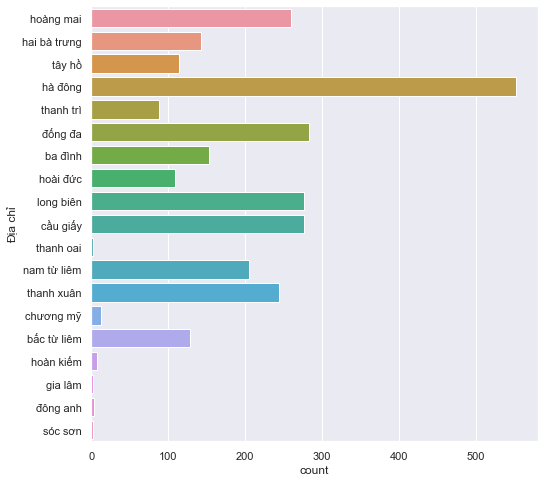

In [278]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(data=data, y="Địa chỉ")

In [279]:
def remove_low_frequency_add(df):
    X = df.copy()
    
    frequency_add = X['Địa chỉ'].value_counts() / X.shape[0] * 100
    id_add = frequency_add.index[frequency_add > 1]
    
    X = X.loc[data['Địa chỉ'].isin(id_add)]
    
    return X

In [280]:
data = remove_low_frequency_add(data)

<AxesSubplot:xlabel='count', ylabel='Địa chỉ'>

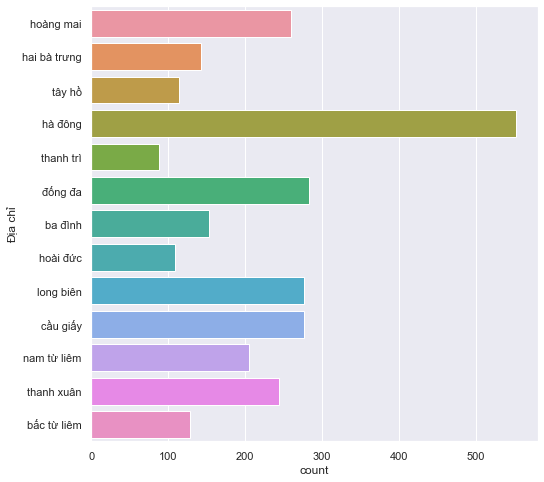

In [281]:
import seaborn as sns
sns.set(rc={'figure.figsize': (8, 8)})
sns.countplot(data=data, y="Địa chỉ")

In [282]:
def handle_outlier(df):
    X = df.copy()
    X = drop_outliers(X)
    X = remove_low_frequency_add(X)
    return X

In [283]:
# data = format_data(data)
# data = handle_missing_data(data)
# data = handle_outlier(data)
data = data.reset_index(drop=True)

# Feature Engineering

In [284]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def get_encode(df):
    X = df.copy()
    address_le = LabelEncoder()
    address_labels = address_le.fit_transform(X['Địa chỉ'])
    X['Địa chỉ_Label'] = address_labels
    # furniture_le = LabelEncoder()
    # furniture_labels = furniture_le.fit_transform(X['Nội thất'])
    # X['Nội thất_Label'] = furniture_labels
    
    address_ohe = OneHotEncoder().fit(X[['Địa chỉ_Label']])
    
    # furniture_ohe = OneHotEncoder().fit(X[['Nội thất_Label']])

    return address_le, address_ohe
    
def encoding(df, address_le, address_ohe,):
    X = df.copy()

    X['Địa chỉ_Label'] = address_le.transform(X['Địa chỉ'])



    address_feature_arr = address_ohe.transform(X[['Địa chỉ_Label']]).toarray()
    address_feature_labels = list(address_le.classes_)
    address_features = pd.DataFrame(address_feature_arr, columns=address_feature_labels)


    # furniture_feature_arr = furniture_ohe.transform(X[['Nội thất_Label']]).toarray()
    # furniture_feature_labels = list(furniture_le.classes_)
    # furniture_features = pd.DataFrame(furniture_feature_arr, columns=furniture_feature_labels)
    
    X = pd.concat([X.drop(['Địa chỉ', 'Địa chỉ_Label'], axis=1), address_features], axis=1)
    return X

In [285]:
address_le, address_ohe= get_encode(data)

In [286]:
data = encoding(data, address_le, address_ohe)

In [287]:
data.iloc[:, 7:]

,Số phòng ngủ,ba đình,bắc từ liêm,cầu giấy,hai bà trưng,hoài đức,hoàng mai,hà đông,long biên,nam từ liêm,thanh trì,thanh xuân,tây hồ,đống đa
0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2827,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2828,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2829,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [288]:
from sklearn.model_selection import train_test_split
X = data.drop(['Mức giá'], axis=1)
y = data['Mức giá']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12345)
print(f'Kích thước tập train {X_train.shape}')
print(f'Kích thước tập train {X_test.shape}')

Kích thước tập train (2264, 20)
Kích thước tập train (567, 20)


In [289]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_model(model):
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)  
    y_test_predict = model.predict(X_test)
    
    metric_model = {}
    metric_model['MAE_train'] = mean_absolute_error(y_train, y_train_predict)
    metric_model['MSE_train'] = mean_squared_error(y_train, y_train_predict)
    metric_model['MAE_test'] = mean_absolute_error(y_test, y_test_predict)
    metric_model['MSE_test'] = mean_squared_error(y_test,y_test_predict)
    ser = pd.Series(metric_model)
    return ser

In [290]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(), XGBRegressor(), RandomForestRegressor()]
list_metrics_models = []
for model in models:
    metric = train_model(model)
    list_metrics_models.append(metric)

df_models = pd.DataFrame(list_metrics_models, index=['LinearRegression', 'XGBRegressor', 'RandomForestRegressor'])
df_models.T

,LinearRegression,XGBRegressor,RandomForestRegressor
MAE_train,0.883760,0.377488,0.338835
MSE_train,1.357112,0.309952,0.245124
MAE_test,0.877925,0.836236,0.830767
MSE_test,1.305828,1.394762,1.349034


Text(0.5, 0, 'Metrics')

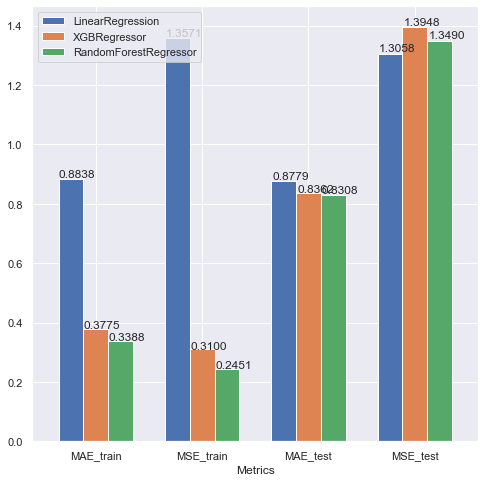

In [291]:
import matplotlib.pyplot as plt
ax = df_models.T.plot(kind='bar', width=0.7)
for p in ax.patches:
    ax.annotate('{:.4f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(rotation=360)
plt.xlabel('Metrics')

# Test

In [292]:
model = RandomForestRegressor().fit(X_train, y_train)


In [293]:
def format_data_output(df):
    X = df.copy()
    X = format_data(X)
    X.drop(['Hướng nhà', 'Hướng ban công'], axis=1, inplace=True)
    X.dropna(inplace=True)
    X = X[X['Địa chỉ'].isin(address_le.classes_)]
    X = X.reset_index(drop=True)
    test = X[['Địa chỉ', 'Diện tích', 'Mặt tiền', 'Đường vào', 'Số tầng', 'Số toilet',
                'Số phòng ngủ', 'Nội thất']]

    test = encoding(test, address_le, address_ohe)
    return test, X['Mức giá']

In [299]:
new_df= pd.read_csv('test.csv')
input, target = format_data_output(new_df)


In [304]:
model = RandomForestRegressor().fit(X_train, y_train)
predict = model.predict(input)
rs = pd.concat([target, pd.Series(predict, name='Dự đoán')], axis=1)
rs

c:\Users\pqhuy\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,Mức giá,Dự đoán
0,4.90,4.85130
1,4.95,4.85130
2,4.90,4.85130
3,7.50,6.50700
4,5.00,5.32420
...,...,...
127,6.80,7.10540
128,6.75,6.33895
129,3.15,2.88630
130,2.45,3.11620


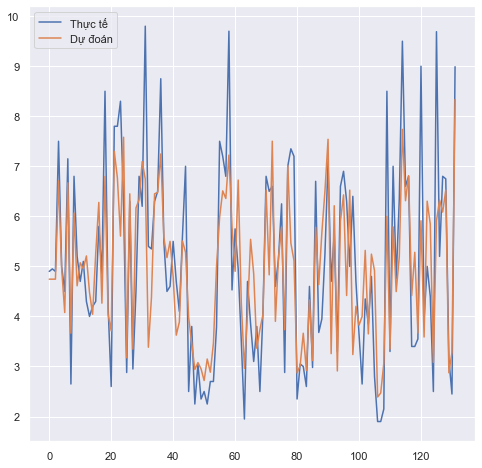

In [301]:
plt.plot(rs.index, rs['Mức giá'], label='Thực tế',)
plt.plot(rs.index, rs['Dự đoán'], label='Dự đoán')
plt.legend()
plt.show()

In [297]:
new_data = {
    'Địa chỉ': 'Văn Quán, Hà Đông, Hà Nội',
    'Diện tích': '54 m^2',
    'Mặt tiền': '5 m',
    'Đường vào': '3 m',
    'Số tầng': '4 tầng',
    'Số toilet': '4 phòng',
    'Số phòng ngủ': ' 3 phòng',
    'Nội thất' : 'Full',
    'Pháp lý': 'Sổ đỏ'
}
new_df = pd.DataFrame([new_data])
# input, target = format_data_output(new_df)